<a href="https://colab.research.google.com/github/prabdeepkaur/algo_strategies_mini_project2_prabdeep/blob/main/algo_strategies2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESIGN ANALYSIS AND ALGORITHM**

In [1]:
!pip install memory_profiler

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import memory_usage
import time

In [6]:
ads = [
    {"id": "ad1", "deadline": 1, "profit": 68},
    {"id": "ad2", "deadline": 1, "profit": 19},
    {"id": "ad3", "deadline": 2, "profit": 45},
    {"id": "ad4", "deadline": 2, "profit": 60},
    {"id": "ad5", "deadline": 4, "profit": 10},
]

In [7]:
# Sort ads in descending order by profit
sorted_ads = sorted(ads, key=lambda x: x['profit'], reverse=True)

# Find maximum deadline to know number of slots
max_deadline = max(ad['deadline'] for ad in ads)

# Initialize slots: -1 means free slot
slots = [-1] * max_deadline

# Result list to hold scheduled ads
scheduled_ads = [None] * max_deadline

for ad in sorted_ads:
    for slot in range(ad['deadline'] - 1, -1, -1):
        if slots[slot] == -1:
            slots[slot] = 1
            scheduled_ads[slot] = ad['id']
            break

print("Scheduled commercials in slots:", scheduled_ads)

Scheduled commercials in slots: ['ad1', 'ad4', None, 'ad5']


Time taken: 0.229595 seconds
Max memory used: 111.285156 MiB


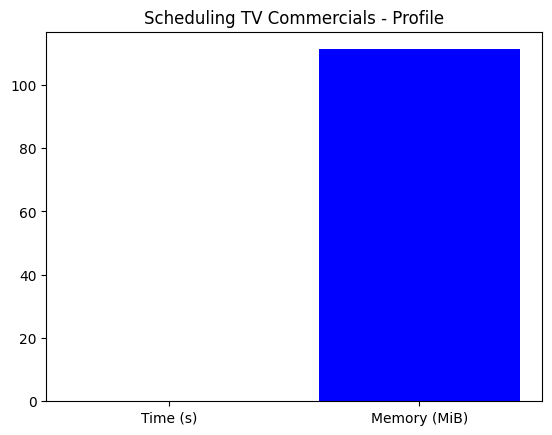

In [16]:
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def schedule_ads(ads):
    sorted_ads = sorted(ads, key=lambda x: x['profit'], reverse=True)
    max_deadline = max(ad['deadline'] for ad in ads)
    slots = [-1] * max_deadline
    scheduled_ads = [None] * max_deadline

    for ad in sorted_ads:
        for slot in range(ad['deadline'] - 1, -1, -1):
            if slots[slot] == -1:
                slots[slot] = 1
                scheduled_ads[slot] = ad['id']
                break
    return scheduled_ads

# Profile time
start = time.time()
mem_usage = memory_usage((schedule_ads, (ads,)))
end = time.time()

elapsed_time = end - start
max_mem = max(mem_usage)

print(f"Time taken: {elapsed_time:.6f} seconds")
print(f"Max memory used: {max_mem:.6f} MiB")

# Plotting
plt.bar(['Time (s)', 'Memory (MiB)'], [elapsed_time, max_mem], color=['blue', 'blue'])
plt.title('Scheduling TV Commercials - Profile')
plt.show()

Problem 2: Maximizing Profit with Limited Budget

In [9]:
items = [
    {"id": "item1", "weight": 50, "value": 62},
    {"id": "item2", "weight": 70, "value": 76},
    {"id": "item3", "weight": 60, "value": 12},
]
total_budget = 50

In [10]:
def knapsack(items, capacity):
    n = len(items)
    # Create DP table
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    # Build table dp[][] in bottom-up manner
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if items[i-1]['weight'] <= w:
                dp[i][w] = max(
                    items[i-1]['value'] + dp[i-1][w - items[i-1]['weight']],
                    dp[i-1][w]
                )
            else:
                dp[i][w] = dp[i-1][w]

    # To find which items are included
    w = capacity
    selected_items = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            selected_items.append(items[i-1]['id'])
            w -= items[i-1]['weight']

    selected_items.reverse()

    return dp[n][capacity], selected_items

max_profit, selected = knapsack(items, total_budget)
print(f"Maximum profit: {max_profit}")
print(f"Selected items: {selected}")

Maximum profit: 62
Selected items: ['item1']


Time taken: 0.097306 seconds
Max memory used: 113.160156 MiB


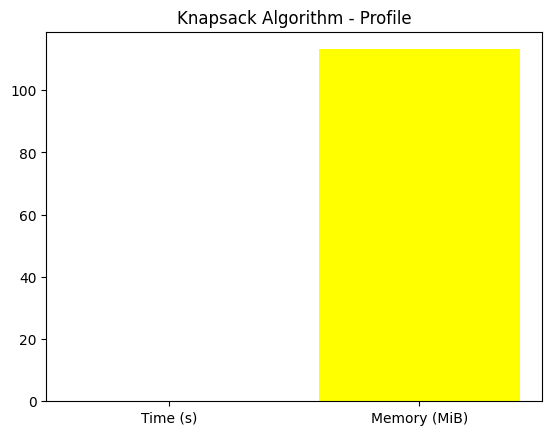

In [25]:
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def profile_knapsack(items, capacity):
    start = time.time()
    mem_usage = memory_usage((knapsack, (items, capacity)))
    end = time.time()

    elapsed_time = end - start
    max_mem = max(mem_usage)

    return elapsed_time, max_mem

time_taken, max_memory = profile_knapsack(items, total_budget)

print(f"Time taken: {time_taken:.6f} seconds")
print(f"Max memory used: {max_memory:.6f} MiB")

plt.bar(['Time (s)', 'Memory (MiB)'], [time_taken, max_memory], color=['purple', 'yellow'])
plt.title('Knapsack Algorithm - Profile')
plt.show()

Problem 3: Solving Sudoku Puzzle


In [12]:
sudoku_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9],
]

In [14]:
def is_valid(board, row, col, num):
    # Check if num is not in the current row and column
    for i in range(9):
        if board[row][i] == num or board[i][col] == num:
            return False

    # Check the 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False

    return True

def solve_sudoku(board):
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        if solve_sudoku(board):
                            return True
                        board[row][col] = 0
                return False
    return True

# Solve and print the sudoku grid
if solve_sudoku(sudoku_grid):
    for row in sudoku_grid:
        print(row)
else:
    print("No solution exists")

[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]


Time taken: 0.084506 seconds
Max memory used: 111.285156 MiB


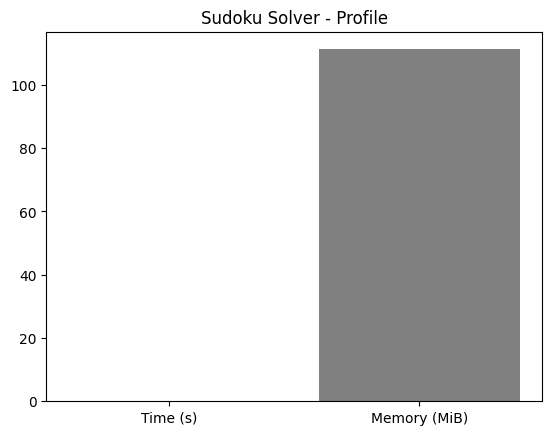

In [15]:
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def profile_sudoku_solver(board):
    start = time.time()
    mem_usage = memory_usage((solve_sudoku, (board,)))
    end = time.time()

    elapsed_time = end - start
    max_mem = max(mem_usage)

    return elapsed_time, max_mem

time_taken, max_memory = profile_sudoku_solver(sudoku_grid)

print(f"Time taken: {time_taken:.6f} seconds")
print(f"Max memory used: {max_memory:.6f} MiB")

plt.bar(['Time (s)', 'Memory (MiB)'], [time_taken, max_memory], color=['red', 'gray'])
plt.title('Sudoku Solver - Profile')
plt.show()

**Problem 4: Password Cracking (Naive)**

In [22]:
target_password = "abc"
charset = "abc123"

In [23]:
import itertools
import time

def brute_force_password(target, charset, max_length=4):
    attempt_count = 0
    start_time = time.time()

    for length in range(1, max_length + 1):
        for guess in itertools.product(charset, repeat=length):
            attempt_count += 1
            guess_str = ''.join(guess)
            if guess_str == target:
                end_time = time.time()
                print(f"Password found: {guess_str}")
                print(f"Total attempts: {attempt_count}")
                print(f"Time taken: {end_time - start_time:.6f} seconds")
                return guess_str, attempt_count, end_time - start_time

    print("Password not found within max length")
    return None, attempt_count, time.time() - start_time

result, attempts, duration = brute_force_password(target_password, charset)

Password found: abc
Total attempts: 51
Time taken: 0.000020 seconds


Password found: abc
Total attempts: 51
Time taken: 0.000088 seconds
Password found: abc
Total attempts: 51
Time taken: 0.000080 seconds
Password found: abc
Total attempts: 51
Time taken: 0.000087 seconds
Password found: abc
Total attempts: 51
Time taken: 0.000066 seconds
Password found: abc
Total attempts: 51
Time taken: 0.000067 seconds
Password found: abc
Total attempts: 51
Time taken: 0.000045 seconds
Password found: abc
Total attempts: 51
Time taken: 0.000045 seconds
Time taken: 0.094201 seconds
Max memory used: 112.285156 MiB


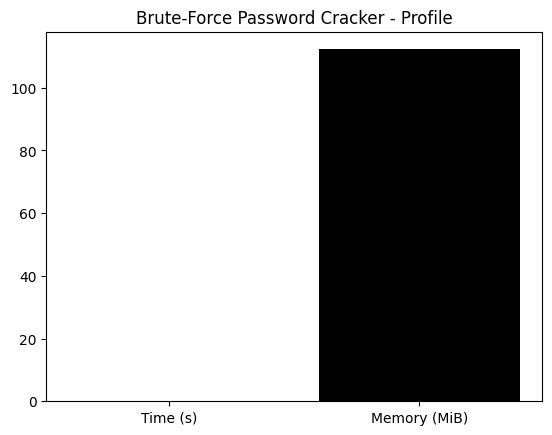

In [24]:
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def profile_bruteforce_password(target, charset):
    start = time.time()
    mem_usage = memory_usage((brute_force_password, (target, charset)))
    end = time.time()

    elapsed_time = end - start
    max_mem = max(mem_usage)

    return elapsed_time, max_mem

time_taken, max_memory = profile_bruteforce_password(target_password, charset)

print(f"Time taken: {time_taken:.6f} seconds")
print(f"Max memory used: {max_memory:.6f} MiB")

plt.bar(['Time (s)', 'Memory (MiB)'], [time_taken, max_memory], color=['cyan', 'black'])
plt.title('Brute-Force Password Cracker - Profile')
plt.show()